In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import truncnorm
def my_colormap(x,y,z,axs,fig,title='pcolormesh'):
    
# y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = np.abs(z).min(), np.abs(z).max()
    # z_min, z_max = 0.00064, 0.048
    z_min, z_max = np.min(z+0.00001), np.max(z+0.00001)

    # print(np.min(z), np.max(z))
    # c=axs.pcolor(x, y, z,norm=colors.LogNorm(vmin=z_min, vmax=z_max),cmap='RdBu')
    c = axs.pcolor(x, y, z, cmap='Blues', vmin=z_min, vmax=z_max)
    axs.set_title(title)
    # set the limits of the plot to the limits of the data
    axs.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=axs)
    return('sup')


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs()

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def rotate_2D(x,y,angle=np.pi/4):
    xy = np.array([x,y])
    c ,s = np.cos(angle), np.sin(angle)
    R = np.array(((c, -s), (s, c)))
    rot = np.dot(R,xy)
    return rot[0],rot[1]

class defect:
    # constructor
    def __init__(self,thickness=0.2,resolution=100,r=1,center=(0,0)):
        self.fraction = 1
        self.resolution = resolution
        self.thickness = thickness
        self.theta = np.linspace(0, 2*np.pi*self.fraction, self.resolution)
        self.r = r
        self.x1 = self.r*np.cos(self.theta)+center[0] 
        self.y1 = self.r*np.sin(self.theta)+center[1]

        self.x2 = (self.r-self.thickness)*np.cos(self.theta) +center[0]
        self.y2 = (self.r-self.thickness)*np.sin(self.theta) +center[1]
    def plot(self):
        fig, ax = plt.subplots(1)
        ax.scatter(self.x1, self.y1)
        ax.scatter(self.x2, self.y2)
        ax.set_aspect(1)
        plt.grid(linestyle='--')
        plt.show()
   
    def add_bump(self,mu=0,sigma=2,lumpyness=-1):
        #top = int(self.resolution/2) # apply only to the first half
        top_1 = np.where(self.y1 >= 0)
        top_2 = np.where(self.y2 >= 0)
        #plt.plot(self.x1[top_1],self.y1[top_1])
        
        gauss_y1 = gaussian(self.x1[top_1],mu,sigma)
        gauss_y2 = gaussian(self.x2[top_2],mu,sigma)
        
        #plt.plot(x1[top_1],gauss_y1-np.min(gauss_y1))
        #plt.plot(x2[top_2],- lumpyness *(gauss_y2-np.min(gauss_y2)))
        
        self.y1[top_1] = self.y1[top_1] + gauss_y1-np.min(gauss_y1)
        self.y2[top_2] = self.y2[top_2] - lumpyness *(gauss_y2-np.min(gauss_y2)) #+ np.max(y2)
        
    
    def rotate(self,angle=np.pi/4):
        self.x1, self.y1 = rotate_2D(self.x1,self.y1,angle=angle)
        self.x2, self.y2 = rotate_2D(self.x2,self.y2,angle=angle)

    def cut(self,fraction=1/2):
        angle = fraction*2*np.pi
        self.fraction=fraction
#         split = np.where( np.arctan2(self.y1,self.x1)+np.pi < angle ) # kazkaip cia gustai per sudetingai sugalvojai
        split= np.where(self.theta<angle) #pakeiciau nes kitai neveike kai defekto centras ne (0,0)
        self.x1, self.y1 = self.x1[split], self.y1[split]
        self.x2, self.y2 = self.x2[split], self.y2[split]
     
    # need some work
    def fill(self,axs,cutoff=0.2):
        if self.fraction<1:
            axs.set_aspect(1)
#             right_bound = [ print(i,np.abs(self.x1[i]-self.x1[i-1]), np.abs(self.x1[i-1]-self.x1[i-2])) for i,x in enumerate(self.x1) if np.abs(self.x1[i]                 -self.x1[i-1]) > cutoff * np.abs(self.x1[i-1]-self.x1[i-2]) ]
#             right_bound = [ i for i,x in enumerate(self.x1) if np.abs(self.x1[i]-self.x1[i-1]) > 0.1 + np.abs(self.x1[i-1]-self.x1[i-2]) ]

#             left_bound = int(right_bound[0]-1)
            axs.plot(self.x1,self.y1,color='grey')
            axs.plot(self.x2,self.y2,color='grey')
            pair_r = ([self.x1[0],self.x2[0]],[self.y1[0],self.y2[0]])#([self.x1[right_bound],self.x2[right_bound]],[self.y1[right_bound],self.y2[right_bound]])
            # plt.plot(pair[0],pair[1])
            pair_l = ([self.x1[-1],self.x2[-1]],[self.y1[-1],self.y2[-1]])#([self.x1[left_bound],self.x2[left_bound]],[self.y1[left_bound],self.y2[left_bound]])
            # plt.plot(pair[0],pair[1])
            r_l=np.sqrt((pair_l[0][0]-np.average(pair_l[0]))**2+(pair_l[1][0]-np.average(pair_l[1]))**2)
            r_r=np.sqrt((pair_r[0][0]-np.average(pair_r[0]))**2+(pair_r[1][0]-np.average(pair_r[1]))**2)

            Circle1=plt.Circle((np.average(pair_l[0]),np.average(pair_l[1])),r_l,color='grey')
            Circle2=plt.Circle((np.average(pair_r[0]),np.average(pair_r[1])),r_r,color='grey')
            axs.add_artist(Circle1)
            axs.add_artist(Circle2)
            # plt.show()
            print(np.average(pair_l[0]),np.average(pair_l[1]),'yayayaya')
            print(np.average(pair_r[0]),np.average(pair_r[1]),'yayayaya')
            xs=np.array([self.x1,self.x2])
            ys=np.array([self.y1,self.y2])
            xs[0,:] = xs[0,::-1]
            ys[0,:] = ys[0,::-1]
            axs.fill(np.ravel(xs), np.ravel(ys),color='grey', edgecolor='grey')
#             axs.scatter(self.x1[0],self.y1[0],color='black')
#             axs.scatter(self.x1[-1],self.y1[-1],color='orange')
#             axs.scatter(self.x2[0],self.y2[0],color='black')
#             axs.scatter(self.x2[-1],self.y2[-1],color='orange')
        else:
            print('Full circle')
            axs.plot(self.x1, self.y1,color='red')
            axs.plot(self.x2, self.y2,color='red')
            axs.set_aspect(1)
            xs=np.array([self.x1,self.x2])
            ys=np.array([self.y1,self.y2])
            xs[0,:] = xs[0,::-1]
            ys[0,:] = ys[0,::-1]
            axs.fill(np.ravel(xs), np.ravel(ys),color='grey', edgecolor='grey')
#             plt.grid(linestyle='--')
#             plt.show()
   
    def get_csv(self,path='contour.csv'):
        self.x = np.concatenate((self.x1,self.x2))
        self.y = np.concatenate((self.y1,self.y2))
        d = {'x': self.x, 'y': self.y}
        df = pd.DataFrame(data=d)
        df.to_csv(path, index=False,sep=" ")
        #print(len(self.x))
        #print(df)
#     def fill2(self):
#         thickness2= np.sqrt((self.x1-self.x2)**2 + (self.y1-self.y2)**2)
#         x1q0=x1[np.where(self.theta<=0.5*np.pi)]
#         x1q1=x1[np.where(self.theta>0.5*np.pi and self.theta <= 1*np.pi)]
#         x1q2=x1[np.where(self.theta>1*np.pi and self.theta <= 1.5*np.pi)]
#         x1q3=x1[np.where(self.theta>1.5*np.pi and self.theta <= 2*np.pi)]

#         x2q0=x2[np.where(self.theta<=0.5*np.pi)]
#         x2q1=x2[np.where(self.theta>0.5*np.pi and self.theta <= 1*np.pi)]
#         x2q2=x2[np.where(self.theta>1*np.pi and self.theta <= 1.5*np.pi)]
#         x2q3=x2[np.where(self.theta>1.5*np.pi and self.theta <= 2*np.pi)]

#         y1q0=y1[np.where(self.theta<=0.5*np.pi)]
#         y1q1=y1[np.where(self.theta>0.5*np.pi and self.theta <= 1*np.pi)]
#         y1q2=y1[np.where(self.theta>1*np.pi and self.theta <= 1.5*np.pi)]
#         y1q3=y1[np.where(self.theta>1.5*np.pi and self.theta <= 2*np.pi)]

#         y2q0=y2[np.where(self.theta<=0.5*np.pi)]
#         y2q1=y2[np.where(self.theta>0.5*np.pi and self.theta <= 1*np.pi)]
#         y2q2=y2[np.where(self.theta>1*np.pi and self.theta <= 1.5*np.pi)]
#         y2q3=y2[np.where(self.theta>1.5*np.pi and self.theta <= 2*np.pi)]


        
        
#   # Geting random shape


4.47847846578515
1.5051093771154658 -10.739018007602953 yayayaya
1.697959941963697 -11.352000173087482 yayayaya
3.9928781956658375
-0.2504346559214935 -1.167622167804042 yayayaya
-0.5247843027061248 -1.5722548841761443 yayayaya
2.723500880651802
-10.723459902544416 1.57771733206121 yayayaya
-10.712807868180759 2.072381458404931 yayayaya
3.0925784738217095
6.858545189609705 -4.718059686841592 yayayaya
6.339227758748285 -4.932406235121137 yayayaya
2.570229378886988
4.898216584342389 4.649254761841878 yayayaya
5.630316750295439 4.374538409443458 yayayaya
4.317898623653245
9.724495442338032 0.7645312163480094 yayayaya
9.986981573448485 0.8014213063142082 yayayaya
3.7780801325156137
7.3093846771053315 6.818531881541583 yayayaya
8.079599472515262 6.811800037365603 yayayaya
2.5498761019681813
10.214891158116668 -1.2880280044586088 yayayaya
10.637631393824407 -1.9669958391844196 yayayaya
1.9464281949203333
-3.4495501158925856 -0.8574571981924426 yayayaya
-3.727192960655181 -0.19051453110704275

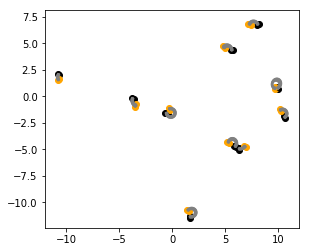

In [102]:
# d = defect(center=(1,1))
# for i in range(10):
fig ,axs = plt.subplots(1,1)

for i in range(10):
    center=np.random.random(2)*10
    cut_angle=np.random.random(1)*0.8+0.2
    d = defect(r=0.5,center=center)
    sigma = get_truncated_normal(mean=3, sd=1, low=0.01, upp=1000)
    print(sigma)
    lumpyness = get_truncated_normal(mean=-1, sd=1, low=-1, upp=5)
    angle = np.random.normal(np.pi/4,4)
    d.add_bump(sigma=sigma,lumpyness=lumpyness)
    d.cut(cut_angle)
    d.rotate(angle=angle)
    d.fill(axs)
plt.show()
fig.savefig(r"C:\Users\lokmis.l\Downloads\fname2.jpg", dpi=72)


In [ ]:
fig ,axs = plt.subplots(1,1)

for i in range(10):
    center=np.random.random(2)*10
    cut_angle=np.random.random(1)*0.7+0.3
    d = defect(r=0.5,center=center)
    sigma = get_truncated_normal(mean=3, sd=1, low=0.01, upp=1000)
    print(sigma)
    lumpyness = get_truncated_normal(mean=-1, sd=1, low=-1, upp=5)
    angle = np.random.normal(np.pi/4,4)
    d.add_bump(sigma=sigma,lumpyness=lumpyness)
    d.cut(0.8)
    d.rotate(angle=angle)
    d.fill(axs)
plt.show()
fig.savefig(r"C:\Users\lokmis.l\Downloads\fname2.jpg", dpi=72)

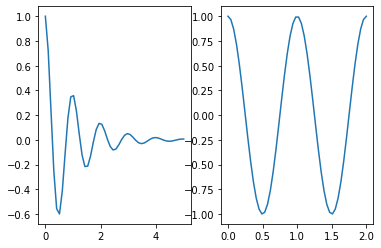

/home/icrom/anaconda3/envs/fenicsproject/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


ValueError: cannot reshape array of size 283464 into shape (288,432,3)

In [13]:
#  conda install -c conda-forge opencv 
import numpy as np
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread('opencv_logo.png')
# blur = cv2.blur(img,(5,5))

# plt.subplot(121),plt.imshow(img),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
# plt.xticks([]), plt.yticks([])
# plt.show()



fig, axs = plt.subplots(1,2)


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1) 
y2 = np.cos(2 * np.pi * x2)
axs[0].plot(x1,y1)
axs[1].plot(x2,y2)
# fig.canvas.draw()
plt.show()
img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
blur = cv2.blur(img,(2,2))
plt.show()
plt.imshow(blur)
plt.show()
blur = cv2.blur(img,(6,6))
plt.imshow(blur)
plt.show()


In [42]:
center=np.random.random(2)
print(center)

[0.23458764 0.9259724 ]
